## Pre-Procesing

In [5]:
from preprocessing import train_valid_test_split, combine_labels, get_attribute_dims

In [6]:
# Train-Test Split Folders
SOURCE_DATA_DIR = "data/ClothingAttributeDataset/images/"
TARGET_DATA_DIR = "data/ClothingAttributeDataset/"

# Labels File
LABEL_DIR = "data/ClothingAttributeDataset/labels/"
labels_file = "data/labels.csv"
label_values_file = "data/label_values.json"

# Train and Validation Images
TRAIN_IMAGES_FOLDER = "data/ClothingAttributeDataset/train/"
VALID_IMAGES_FOLDER = "data/ClothingAttributeDataset/valid/"

In [ ]:
train_valid_test_split(SOURCE_DATA_DIR, TARGET_DATA_DIR, train_size=0.8, valid_size=0.2)

In [3]:
!ls data/ClothingAttributeDataset/train | wc -l

1484


In [4]:
!ls data/ClothingAttributeDataset/valid | wc -l

372


In [5]:
labels_df = combine_labels(LABEL_DIR, labels_file, label_values_file)

In [6]:
# binary_columns = ['skin_exposure_GT', 'collar_GT', 'gender_GT', 'scarf_GT', 'necktie_GT',  'placket_GT']
# multi_columns = ['category_GT', 'neckline_GT', 'sleevelength_GT']
    
# color_columns = ['white_GT', 'yellow_GT', 'gray_GT', 'green_GT', 'blue_GT', 'brown_GT', 'red_GT',
#                  'cyan_GT', 'black_GT', 'purple_GT', 'many_colors_GT']
# pattern_columns = ['pattern_spot_GT', 'pattern_solid_GT', 'pattern_graphics_GT', 
#                   'pattern_plaid_GT', 'pattern_stripe_GT', 'pattern_floral_GT']

## Build Models

In [7]:
from classifiers import get_pretrained_model, create_attributes_model

In [8]:
target_dims = get_attribute_dims(label_values_file)

In [9]:
target_dims

{'category_GT': 7,
 'collar_GT': 2,
 'gender_GT': 2,
 'neckline_GT': 3,
 'necktie_GT': 2,
 'pattern_GT': 6,
 'placket_GT': 2,
 'scarf_GT': 2,
 'skin_exposure_GT': 2,
 'sleevelength_GT': 3}

In [10]:
pretrained_features, pretrained_fc, fc_dim = get_pretrained_model("alexnet")

In [11]:
models = create_attributes_model(pretrained_fc, pretrained_features, fc_dim, target_dims, "weights/",
                                labels_file, TRAIN_IMAGES_FOLDER, VALID_IMAGES_FOLDER, num_epochs=1, is_train=False)

Processing Attribute: scarf_GT
Processing Attribute: category_GT
Processing Attribute: sleevelength_GT
Processing Attribute: necktie_GT
Processing Attribute: pattern_GT
Processing Attribute: gender_GT
Processing Attribute: placket_GT
Processing Attribute: collar_GT
Processing Attribute: neckline_GT
Processing Attribute: skin_exposure_GT


In [12]:
models

{'category_GT': AttributeModel (
   (model): Sequential (
     (0): Dropout (p = 0.5)
     (1): Linear (9216 -> 4096)
     (2): ReLU (inplace)
     (3): Dropout (p = 0.5)
     (4): Linear (4096 -> 4096)
     (5): ReLU (inplace)
     (6): Linear (4096 -> 7)
   )
 ), 'collar_GT': AttributeModel (
   (model): Sequential (
     (0): Dropout (p = 0.5)
     (1): Linear (9216 -> 4096)
     (2): ReLU (inplace)
     (3): Dropout (p = 0.5)
     (4): Linear (4096 -> 4096)
     (5): ReLU (inplace)
     (6): Linear (4096 -> 2)
   )
 ), 'gender_GT': AttributeModel (
   (model): Sequential (
     (0): Dropout (p = 0.5)
     (1): Linear (9216 -> 4096)
     (2): ReLU (inplace)
     (3): Dropout (p = 0.5)
     (4): Linear (4096 -> 4096)
     (5): ReLU (inplace)
     (6): Linear (4096 -> 2)
   )
 ), 'neckline_GT': AttributeModel (
   (model): Sequential (
     (0): Dropout (p = 0.5)
     (1): Linear (9216 -> 4096)
     (2): ReLU (inplace)
     (3): Dropout (p = 0.5)
     (4): Linear (4096 -> 4096)
     (

In [14]:
pretrained_features

Sequential (
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU (inplace)
  (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU (inplace)
  (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU (inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU (inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
)

In [15]:
from PIL import Image

from torchvision import transforms
from torch.autograd import Variable

In [16]:
data_transforms = transforms.Compose([
    transforms.Scale(266),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [17]:
import numpy as np
from scipy.misc import imread, imsave, imresize
from matplotlib import pyplot as plt

%matplotlib inline

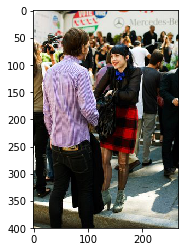

In [59]:
img = imread("data/ClothingAttributeDataset/valid/000077.jpg")
plt.imshow(img)

In [60]:
imsize = 256
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

def image_loader(image_name, transforms, use_gpu=True):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = transforms(image)
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    if use_gpu:
        image = image.cuda()
    return image

image = image_loader("data/ClothingAttributeDataset/valid/000077.jpg", transforms=data_transforms)

In [61]:
image.size()

torch.Size([1, 3, 224, 224])

In [62]:
pretrained_features.cuda()

Sequential (
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU (inplace)
  (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU (inplace)
  (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU (inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU (inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
)

In [63]:
def get_pretrained_features(model, image, use_gpu=True):
    out_features = model(image)
    out_features = out_features.view(out_features.size(0), -1)
    return out_features

In [71]:
def predict_attribute(model, features, use_gpu=True):
    return model(out_features)

In [75]:
import torch

In [85]:
out_features.data.cpu().cpu().numpy()

array([[ 0.20522568,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [72]:
out_features = get_pretrained_features(pretrained_features, image)

In [73]:
predict_attribute(models["neckline_GT"], out_features.cuda())

Variable containing:
 0.5732  0.4265  0.0003
[torch.cuda.FloatTensor of size 1x3 (GPU 0)]

In [44]:
out_features

Variable containing:
  0.0000   0.0000   0.0000  ...    7.7006   5.8663   1.4132
[torch.cuda.FloatTensor of size 1x9216 (GPU 0)]

In [45]:
pretrained_fc(out_features.cpu())

Variable containing:
 -0.0999  -3.9573  -1.1398  ...   -4.5676   0.1438   1.8787
[torch.FloatTensor of size 1x1000]

In [49]:
out_features

Variable containing:
  0.0000   0.0000   0.0000  ...    7.7006   5.8663   1.4132
[torch.cuda.FloatTensor of size 1x9216 (GPU 0)]

In [55]:
models["neckline_GT"](out_features.cuda())

Variable containing:
 0.0575  0.9410  0.0015
[torch.cuda.FloatTensor of size 1x3 (GPU 0)]

In [56]:
## Confusion Matrix

In [57]:
for data in dset_loaders["train"]:
    inputs, labels = data
    if use_gpu:
        X = Variable(inputs.cuda())
    else:
        X = Variable(inputs)
    results = model(X)
    if use_gpu:
        results = results.cpu()
    break

NameError: name 'dset_loaders' is not defined